In [1]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1. Load all of the dimension tables from e-comdata-set2.xlsx into the pandas dataframe.

In [4]:
fact_table = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Fact_table', engine='openpyxl')
trans_dim = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Trans_dim', engine='openpyxl')
item_dim = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Customer_dim', engine='openpyxl')
time_dim = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Time_dim', engine='openpyxl')
store_dim = pd.read_excel('gdrive/My Drive/Data/Assignment1/Part2/Datasets/e-comdata-set2.xlsx', sheet_name='Store_dim', engine='openpyxl')
print("Successfully Loaded the Dataset!")

Successfully Loaded the Dataset!


a. Calculate the mean value of the total price of the fact table.

In [5]:
mean_value = fact_table['total_price'].mean();
mean_value

145.971625

In [ ]:
#fact_table

b. Calculate the standard deviation of all columns of the fact table.

In [6]:
standard_deviation=fact_table.std();
standard_deviation

<ipython-input-6-e46606c5ba25>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  standard_deviation=fact_table.std();


quantity         4.019877
unit_price      10.899616
total_price    122.211823
dtype: float64

In [ ]:
#store_dim

c. Find the most common store size in the store dimension.

In [7]:
val = store_dim[['store_size']].mode()
val

,store_size
0,small


2. Find the store_size-wise monthly total sales price of all stores joining the fact table
and respective dimension table and visualize it to a bar chart.

In [8]:
df2=pd.merge(fact_table,store_dim, on='store_key')
df2

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,store_size,location,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
1,T008,C000014,T00574,I00025,S0012,9,bottles,11.0,99.0,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
2,T009,C000016,T08410,I00047,S0012,6,ct,48.0,288.0,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
3,T002,C000022,T02360,I00063,S0012,10,ct,14.0,140.0,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
4,T003,C000023,T05577,I00031,S0012,6,oz.,10.0,60.0,high,Tolarbag Panir Tanki,Companiganj,Sylhet,Sylhet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T007,C000025,T07848,I00062,S0004,13,ct,14.0,182.0,high,"Rurual Development Officer, BRDB Gournadi, Bar...",Gournadi,Barishal,Barishal
9996,T004,C000020,T00374,I00056,S0004,10,ct,15.0,150.0,high,"Rurual Development Officer, BRDB Gournadi, Bar...",Gournadi,Barishal,Barishal
9997,T004,C000020,T03378,I00009,S0004,7,bottles,17.0,119.0,high,"Rurual Development Officer, BRDB Gournadi, Bar...",Gournadi,Barishal,Barishal
9998,T005,C000043,T09391,I00022,S0004,8,bottles,7.5,60.0,high,"Rurual Development Officer, BRDB Gournadi, Bar...",Gournadi,Barishal,Barishal


In [ ]:
#time_dim

In [9]:
df3=pd.merge(pd.merge(fact_table,store_dim, on='store_key'), time_dim,  on='time_key')
df3

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,store_size,...,upazila,district,division,date,hour,day,week,month,quarter,year
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,high,...,Companiganj,Sylhet,Sylhet,10-02-2019 12:40,12,10,2nd Week,2,Q1,2019
1,T003,C000034,T07440,I00024,S0016,13,bottles,13.0,169.0,small,...,Sylhet-S,Habiganj,Sylhet,10-02-2019 12:40,12,10,2nd Week,2,Q1,2019
2,T008,C000014,T00574,I00025,S0012,9,bottles,11.0,99.0,high,...,Companiganj,Sylhet,Sylhet,11-05-2015 15:01,15,11,2nd Week,5,Q2,2015
3,T007,C000026,T00574,I00063,S0009,11,ct,14.0,154.0,high,...,Balaganj,Habiganj,Sylhet,11-05-2015 15:01,15,11,2nd Week,5,Q2,2015
4,T009,C000016,T08410,I00047,S0012,6,ct,48.0,288.0,high,...,Companiganj,Sylhet,Sylhet,14-03-2019 08:37,8,14,2nd Week,3,Q1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T007,C000001,T04139,I00042,S0004,11,ct,16.0,176.0,high,...,Gournadi,Barishal,Barishal,16-01-2019 07:14,7,16,3rd Week,1,Q1,2019
9996,T007,C000047,T07293,I00014,S0004,1,bottles,14.0,14.0,high,...,Gournadi,Barishal,Barishal,24-04-2019 22:24,22,24,4th Week,4,Q2,2019
9997,T004,C000035,T02906,I00048,S0004,6,ct,46.0,276.0,high,...,Gournadi,Barishal,Barishal,18-05-2016 08:06,8,18,3rd Week,5,Q2,2016
9998,T004,C000020,T03378,I00009,S0004,7,bottles,17.0,119.0,high,...,Gournadi,Barishal,Barishal,07-03-2018 11:34,11,7,1st Week,3,Q1,2018


In [ ]:
#df4 =df3.groupby(['store_size', 'month']).sum(['total_price'])
#df4

In [10]:
df5 =df3.groupby(['store_size', 'month']).aggregate({'total_price':'sum'})
df5

total_price
store_size month             
high       1         37579.25
           2         36937.00
           3         44880.50
           4         39677.00
           5         35278.50
           6         40410.25
           7         38436.75
           8         32935.50
           9         37485.75
           10        40334.00
           11        36200.75
           12        40120.50
medium     1         35317.50
           2         36301.75
           3         37307.50
           4         37442.50
           5         39601.00
           6         35465.50
           7         42736.75
           8         38395.75
           9         40947.50
           10        38168.25
           11        39320.75
           12        33959.00
small      1         43056.00
           2         50925.50
           3         43197.50
           4         46250.75
           5         44293.50
           6         38937.75
           7         44008.50
           8         39850.25
           9         55398.75
           10        45017.50
           11        45773.25
           12        47767.50

Text(0, 0.5, 'Store size')

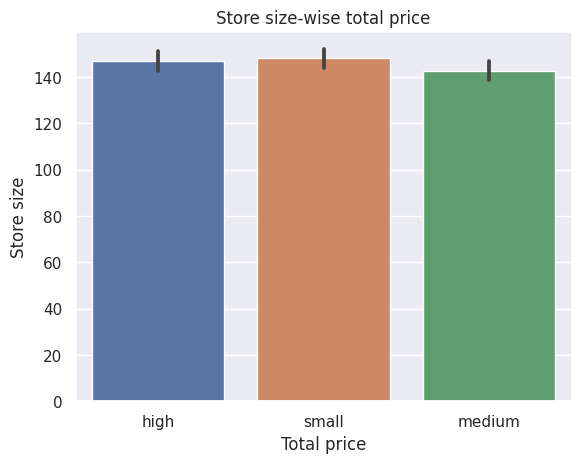

In [12]:
plt.title('Store size-wise total price')
sns.barplot(x = df3['store_size'], y = df3['total_price']);
#sns.barplot(x=df3['total_price'], y = df3['quantity']);
plt.xlabel('Total price')
plt.ylabel('Store size')

Text(0, 0.5, 'Month')

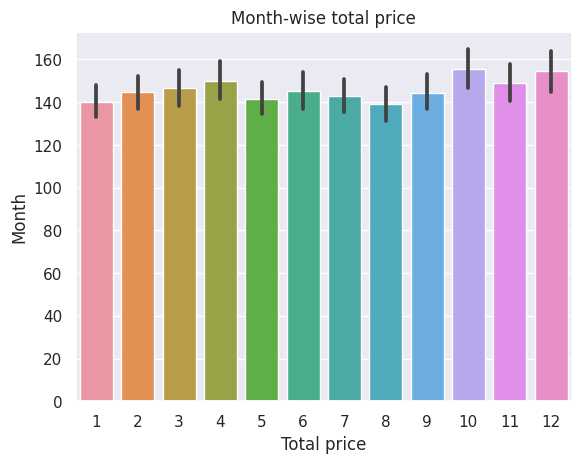

In [13]:
plt.title('Month-wise total price')
sns.barplot(x = df3['month'], y = df3['total_price']);
#sns.barplot(x=df3['total_price'], y = df3['quantity']);
plt.xlabel('Total price')
plt.ylabel('Month')

Text(0, 0.5, 'quantity')

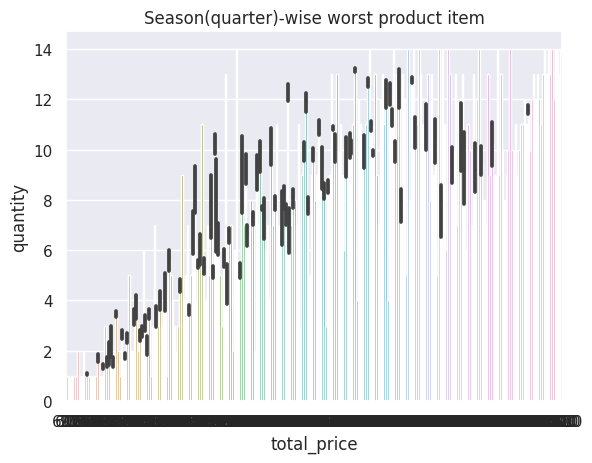

In [14]:
plt.title('Season(quarter)-wise worst product item')
sns.barplot(x=df3['total_price'], y = df3['quantity']);
plt.xlabel('total_price')
plt.ylabel('quantity')


3. Compare the quarter-wise monthly total sales price in Barishal and Sylhet divisions of
all customers joining the fact table and respective dimension tables and visualize it to
a scatter chart

In [15]:
add_customer_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='customer_key')
add_customer_time_with_fact

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T004,C000037,T02461,I00053,S0010,9,ct,15.0,135.0,08-09-2018 11:14,...,2nd Week,9,Q3,2018,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9996,T010,C000037,T09156,I00005,S0008,9,bottles,20.0,180.0,19-01-2016 04:36,...,3rd Week,1,Q1,2016,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9997,T009,C000037,T02683,I00034,S0015,6,tubs,15.0,90.0,27-08-2020 23:12,...,4th Week,8,Q3,2020,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9998,T004,C000037,T09372,I00015,S0001,12,bottles,18.0,216.0,03-04-2014 10:56,...,1st Week,4,Q2,2014,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet


In [17]:
month_wise_barishal = add_customer_time_with_fact.query("division == 'Barishal'")
month_wise_barishal
#barishal_div_g = barishal_div.groupby('month').aggregate({'total_price': 'sum'}).reset_index()
#barishal_div_g

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,T008,C000007,T06494,I00043,S0008,3,ct,14.0,42.0,11-08-2014 13:02,...,2nd Week,8,Q3,2014,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8754,T004,C000007,T03726,I00054,S0008,1,ct,45.0,45.0,01-02-2016 09:35,...,1st Week,2,Q1,2016,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8755,T005,C000007,T01958,I00047,S0016,11,ct,48.0,528.0,16-10-2021 05:19,...,3rd Week,10,Q4,2021,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8756,T009,C000007,T08401,I00064,S0012,8,ct,15.0,120.0,28-03-2017 07:17,...,4th Week,3,Q1,2017,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal


In [18]:
month_wise_barishal_x = month_wise_barishal['month']
month_wise_barishal_x

0        2
1       11
2       12
3       12
4       11
        ..
8753     8
8754     2
8755    10
8756     3
8757     7
Name: month, Length: 5338, dtype: int64

In [19]:
month_wise_barishal_y = month_wise_barishal['total_price']
month_wise_barishal_y

0       135.0
1       320.0
2       112.0
3       162.0
4        18.0
        ...  
8753     42.0
8754     45.0
8755    528.0
8756    120.0
8757    126.0
Name: total_price, Length: 5338, dtype: float64

In [ ]:
sylhet_div = add_customer_time_with_fact.query("division == 'Sylhet'")
sylhet_div_g = sylhet_div.groupby('month').aggregate({'total_price': 'sum'}).reset_index()
sylhet_div_g

,month,total_price
0,1,54831.25
1,2,57434.00
2,3,53249.00
3,4,58120.50
4,5,56626.75
5,6,57647.50
6,7,60151.25
7,8,49555.50
8,9,60211.25
9,10,60024.75


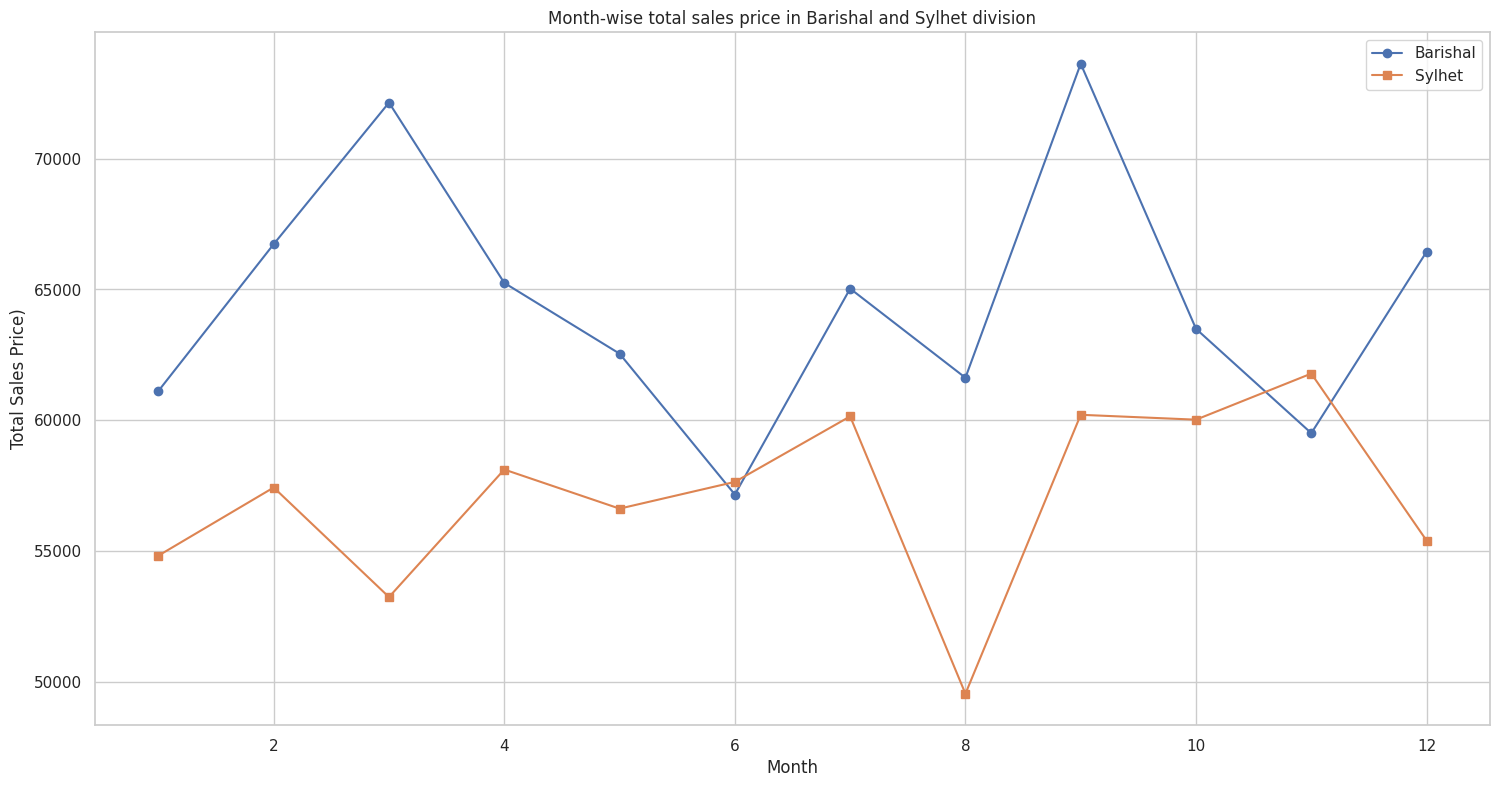

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 9))
plt.plot(barishal_div_g['month'], barishal_div_g['total_price'], marker='o')
plt.plot(sylhet_div_g['month'], sylhet_div_g['total_price'], marker='s')
plt.xlabel('Month')
plt.ylabel('Total Sales Price)')
plt.title("Month-wise total sales price in Barishal and Sylhet division")
plt.legend(['Barishal', 'Sylhet'])

In [ ]:
month_wise_barishal = add_customer_time_with_fact.query("division == 'Barishal'")
month_wise_barishal

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
0,T002,C000013,T07440,I00054,S0012,3,ct,45.0,135.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
1,T008,C000013,T07965,I00069,S0008,10,ct,32.0,320.0,20-11-2015 18:48,...,3rd Week,11,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
2,T005,C000013,T04797,I00063,S0010,8,ct,14.0,112.0,31-12-2015 02:05,...,4th Week,12,Q4,2015,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
3,T006,C000013,T02801,I00060,S0008,9,pk,18.0,162.0,03-12-2020 15:58,...,1st Week,12,Q4,2020,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
4,T007,C000013,T04632,I00016,S0009,1,bottles,18.0,18.0,12-11-2014 20:59,...,2nd Week,11,Q4,2014,sanjay,8801729805729,9653724792214,Barishal Sadar,Barguna,Barishal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,T008,C000007,T06494,I00043,S0008,3,ct,14.0,42.0,11-08-2014 13:02,...,2nd Week,8,Q3,2014,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8754,T004,C000007,T03726,I00054,S0008,1,ct,45.0,45.0,01-02-2016 09:35,...,1st Week,2,Q1,2016,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8755,T005,C000007,T01958,I00047,S0016,11,ct,48.0,528.0,16-10-2021 05:19,...,3rd Week,10,Q4,2021,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal
8756,T009,C000007,T08401,I00064,S0012,8,ct,15.0,120.0,28-03-2017 07:17,...,4th Week,3,Q1,2017,mubarik,8801775935331,1433069550608,Babuganj,Barguna,Barishal


In [ ]:
month_wise_barishal_x = month_wise_barishal['month']

month_wise_barishal_x

0        2
1       11
2       12
3       12
4       11
        ..
8753     8
8754     2
8755    10
8756     3
8757     7
Name: month, Length: 5338, dtype: int64

In [ ]:
month_wise_barishal_y = month_wise_barishal['total_price']
month_wise_barishal_y

0       135.0
1       320.0
2       112.0
3       162.0
4        18.0
        ...  
8753     42.0
8754     45.0
8755    528.0
8756    120.0
8757    126.0
Name: total_price, Length: 5338, dtype: float64

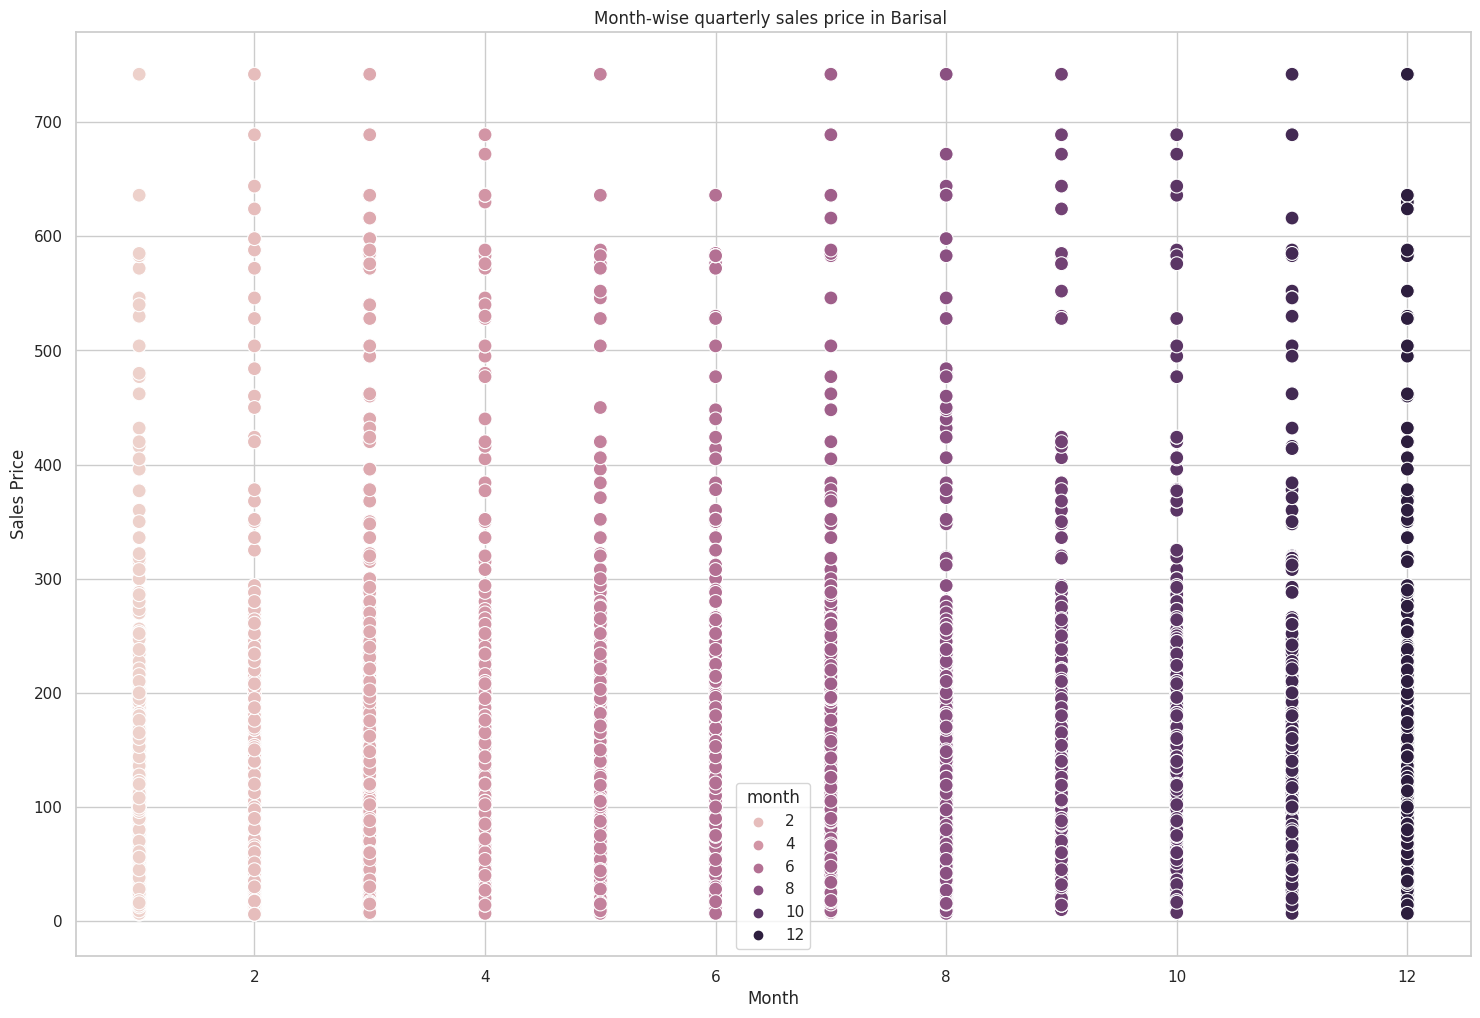

In [ ]:
plt.figure(figsize=(18, 12))
plt.title('Month-wise quarterly sales price in Barisal ')
plt.xlabel("Month")
plt.ylabel("Sales Price")
sns.scatterplot(x=month_wise_barishal_x, 
                y=month_wise_barishal_y,  
                hue=month_wise_barishal.month,
               s=100);

In [ ]:
month_wise_sylhet = add_customer_time_with_fact.query("division == 'Sylhet'")
month_wise_sylhet

,trans_key,customer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,name,contact_no,nid,upazila,district,division
213,T003,C000034,T07440,I00024,S0016,13,bottles,13.0,169.0,10-02-2019 12:40,...,2nd Week,2,Q1,2019,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
214,T006,C000034,T05874,I00013,S0002,9,ct,15.0,135.0,11-07-2015 15:42,...,2nd Week,7,Q3,2015,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
215,T005,C000034,T02622,I00010,S0005,1,bottles,17.0,17.0,24-11-2021 22:06,...,4th Week,11,Q4,2021,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
216,T006,C000034,T05743,I00025,S0019,11,bottles,11.0,121.0,27-04-2014 08:17,...,4th Week,4,Q2,2014,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
217,T010,C000034,T07698,I00054,S0016,7,ct,45.0,315.0,05-05-2014 17:50,...,1st Week,5,Q2,2014,ajay kumar,8801583505660,1597876139595,Zakiganj,Habiganj,Sylhet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,T004,C000037,T02461,I00053,S0010,9,ct,15.0,135.0,08-09-2018 11:14,...,2nd Week,9,Q3,2018,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9996,T010,C000037,T09156,I00005,S0008,9,bottles,20.0,180.0,19-01-2016 04:36,...,3rd Week,1,Q1,2016,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9997,T009,C000037,T02683,I00034,S0015,6,tubs,15.0,90.0,27-08-2020 23:12,...,4th Week,8,Q3,2020,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet
9998,T004,C000037,T09372,I00015,S0001,12,bottles,18.0,216.0,03-04-2014 10:56,...,1st Week,4,Q2,2014,sandeep kumar,8801618691716,2311840840659,Biswanath,Sylhet,Sylhet


In [ ]:
month_wise_sylhet_x = month_wise_sylhet['month']

month_wise_sylhet_x

213      2
214      7
215     11
216      4
217      5
        ..
9995     9
9996     1
9997     8
9998     4
9999     1
Name: month, Length: 4662, dtype: int64

In [ ]:
month_wise_sylhet_y = month_wise_sylhet['total_price']
month_wise_sylhet_y

213     169.0
214     135.0
215      17.0
216     121.0
217     315.0
        ...  
9995    135.0
9996    180.0
9997     90.0
9998    216.0
9999    160.0
Name: total_price, Length: 4662, dtype: float64

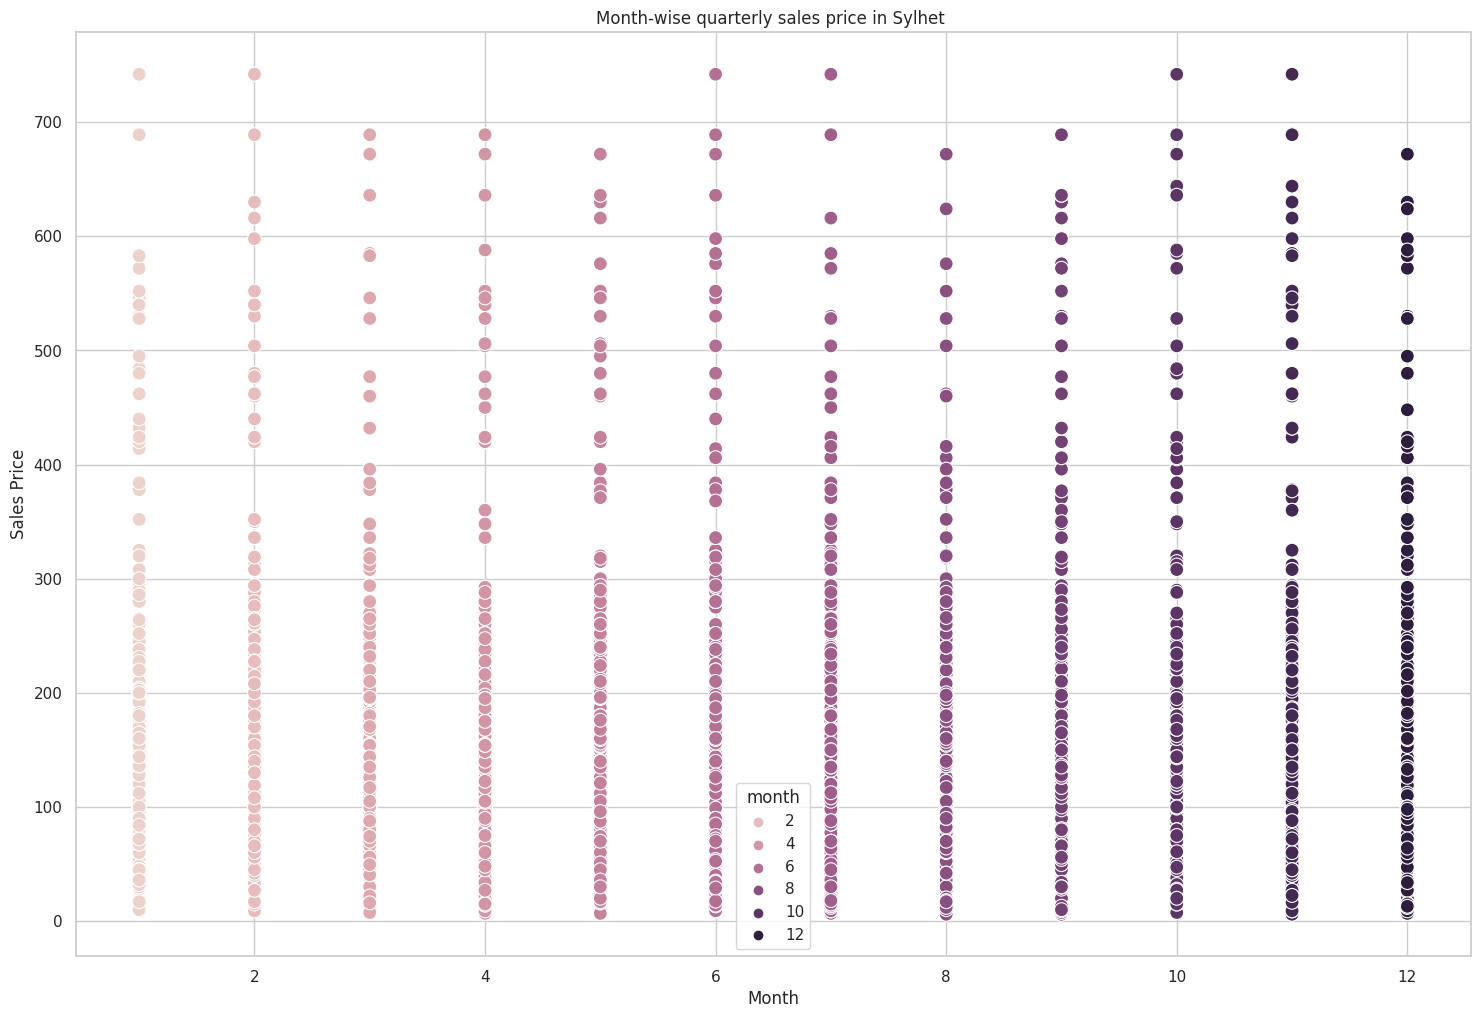

In [ ]:
plt.figure(figsize=(18, 12))
plt.title('Month-wise quarterly sales price in Sylhet ')
plt.xlabel("Month")
plt.ylabel("Sales Price")
sns.scatterplot(x=month_wise_sylhet_x, 
                y=month_wise_sylhet_y,  
                hue=month_wise_sylhet.month,
               s=100);

4. What are the average sales price of items per store quarterly? Show the data in a
line chart

In [ ]:
#add_customer_time_with_fact
sellers_stats = add_customer_time_with_fact.groupby(['item_key', 'quarter']).agg({'total_price': 'mean'}).reset_index()
sellers_stats

,item_key,quarter,total_price
0,I00001,Q1,134.473684
1,I00001,Q2,144.375000
2,I00001,Q3,122.500000
3,I00001,Q4,145.833333
4,I00002,Q1,122.960526
...,...,...,...
271,I00068,Q4,168.000000
272,I00069,Q1,212.114286
273,I00069,Q2,236.972973
274,I00069,Q3,277.052632


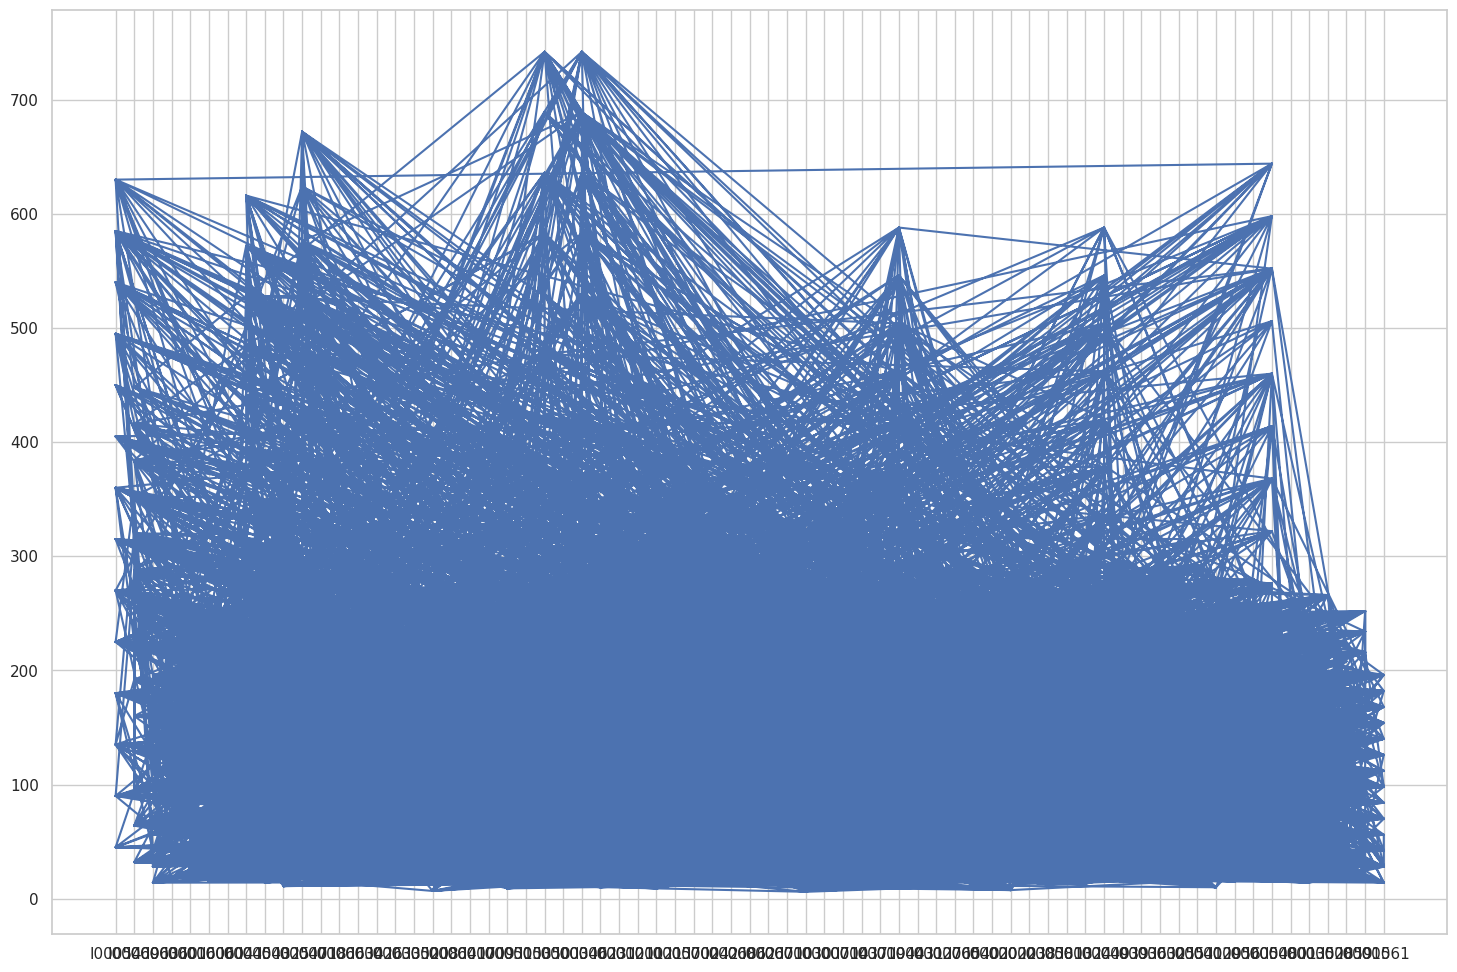

In [ ]:
#sellers_stats.quater#
plt.figure(figsize=(18, 12))
plt.plot(add_customer_time_with_fact.item_key, add_customer_time_with_fact.total_price)
plt.show()

In [ ]:
plt.figure(figsize=(18, 12))
plt.plot(add_customer_time_with_fact.quarter, add_customer_time_with_fact.item_key)
plt.plot(add_customer_time_with_fact.quarter, add_customer_time_with_fact.total_price)
plt.xlabel('Quater')
plt.ylabel('Yield (tons per hectare)');


NameError: ignored

<Figure size 1800x1200 with 0 Axes>